In [1]:
"""
Code to read and Create PPI, B-Scope & A-Scope plot of IMD NetCDF RADAR Data File
using basic Python netCDF4, numpy & matplotlib libraries [Compatible with Python 2 & 3]
Developed by B. Arul Malar Kannan (ba.kannan@imd.gov.in)
Date: 26.06.2021 ver 0.0
"""

'\nCode to read and Create PPI, B-Scope & A-Scope plot of IMD NetCDF RADAR Data File\nusing basic Python netCDF4, numpy & matplotlib libraries [Compatible with Python 2 & 3]\nDeveloped by B. Arul Malar Kannan (ba.kannan@imd.gov.in)\nDate: 26.06.2021 ver 0.0\n'

In [2]:
#CLASSIC NetCDF files are made up of dimensions, variables and attributes.  
#IMD adopted classic NetCDF-3  uncompressed data format adopting fsl conventions for its radar data being distributed to end users
#The code is divided into Seven steps each of which has comments at each cells

In [3]:
#1. Import the needed python libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [4]:
#2. Define basic plotting functions for A-Scope, B-Scope & PPI
def PPI_plot(data,rrr,az,z_min,z_max):
    sinaz=np.sin(az*np.pi/180.)
    cosaz=np.transpose(np.cos(az*np.pi/180.))
    x=np.dot(rrr[:,None],sinaz[None,:])
    y=np.dot(rrr[:,None],cosaz[None,:])
    plt.pcolormesh(x, y, data.T, cmap='RdBu_r', vmin=z_min, vmax=z_max);  #RdBu, seismic, jet, nipy_spectral
    cbar=plt.colorbar();
    cbar.set_label('dBZ', rotation=90);
    plt.axis('equal');
    plt.gca().set_aspect('equal',adjustable='box');
    #Plot range rings at 50km seperation
    ccc=np.arange(-2*np.pi,2*np.pi,.1)
    rr=np.arange(0,rrr.max()+1,50000)
    xr=np.outer(np.sin(ccc),rr)
    yr=np.outer(np.cos(ccc),rr)
    plt.plot(xr,yr,'red', linestyle='--', linewidth=.5, alpha=.4);
    plt.title('PPI Plot - %s'%nc_fle);
    plt.figure(num=None,figsize=(12,8),dpi=80,facecolor='w',edgecolor='k');
    plt.show();

    
#BScope Plotting 
def BScopeplot(arr):
    fig  = plt.figure(1,figsize=(4,4),dpi=300,facecolor='w',edgecolor='w',frameon=True)
    fig  = plt.figure(1)
    imAx=plt.imshow(arr, origin='lower',interpolation='nearest')
    fig.colorbar(imAx,pad=0.01,fraction=0.1,shrink=.60)
    
#Define a AScope plotter
def AScopeplot(arr1):
    fig = plt.figure(2,figsize=(12,4),dpi=300,facecolor='w',edgecolor='w',frameon=True)
    plt.plot(arr1)
    plt.show()

In [5]:
#3. Specify the data file to be handled and ascertain for the format
nc_fle='Output03MUM170321032429.RAWDM3C_sweep1.nc'
dataset = Dataset(nc_fle)
print (dataset.file_format)

NETCDF3_CLASSIC


In [6]:
#3. Interrogate dimensions, variables as dictonary calls of the file

#A. Dimensions of the data
print (dataset.dimensions.keys())

#B. Global attributes
print (dataset.Content)
print (dataset.title)
print (dataset.history)
print (dataset.Conventions)

#C. Variables
varkeys=list(dataset.variables.keys())
print(varkeys)
#Get details of a particular variable
print (dataset.variables['Z'])
#Assign the values of the variable for analysis and plotting
RDRReflectivityFactor=dataset.variables['Z'][:]

dict_keys(['bin', 'radial', 'sweep'])
This file contains one scan of remotely sensed data
IRIS data
Encoded into netcdf from IRIS data
FSL netCDF
['esStartTime', 'elevationNumber', 'elevationAngle', 'radialAzim', 'radialElev', 'radialTime', 'siteLat', 'siteLon', 'siteAlt', 'firstGateRange', 'gateSize', 'nyquist', 'unambigRange', 'calibConst', 'radarConst', 'beamWidthHori', 'pulseWidth', 'bandWidth', 'filterDop', 'elevationList', 'azimuthSpeed', 'highPRF', 'lowPRF', 'dwellTime', 'waveLength', 'calI0', 'calNoise', 'groundHeight', 'meltHeight', 'scanType', 'angleResolution', 'logNoise', 'linNoise', 'inphaseOffset', 'quadratureOffset', 'logSlope', 'logFilter', 'filterPntClt', 'filterThreshold', 'sampleNum', 'SQIThresh', 'LOGThresh', 'SIGThresh', 'CSRThresh', 'DBTThreshFlag', 'DBZThreshFlag', 'VELThreshFlag', 'WIDThreshFlag', 'beamWidthVert', 'T', 'Z', 'V', 'W']
<class 'netCDF4._netCDF4.Variable'>
int8 Z(radial, bin)
    units: dBZ
    long_name: Reflectivity
    polarization: Horizontal
  

In [7]:
#4. Getting details of the 3D radial data stream forming the pseudo polar data set
# Radials [R]
dta_rsc=dataset.variables['gateSize'][:]
dta_strbin=dataset.variables['firstGateRange'][:]
dta_rbin=dataset.dimensions['bin'].size
#Create a 1D array of radials
r=np.arange(dta_strbin,dta_strbin+dta_rbin*dta_rsc,dta_rsc)
#print(r)

# Azimuths [Theta]
az=dataset.variables['radialAzim'][:]
#print (az)

# Elevation [Phi]
el=dataset.variables['elevationAngle'][:]
#print (el)

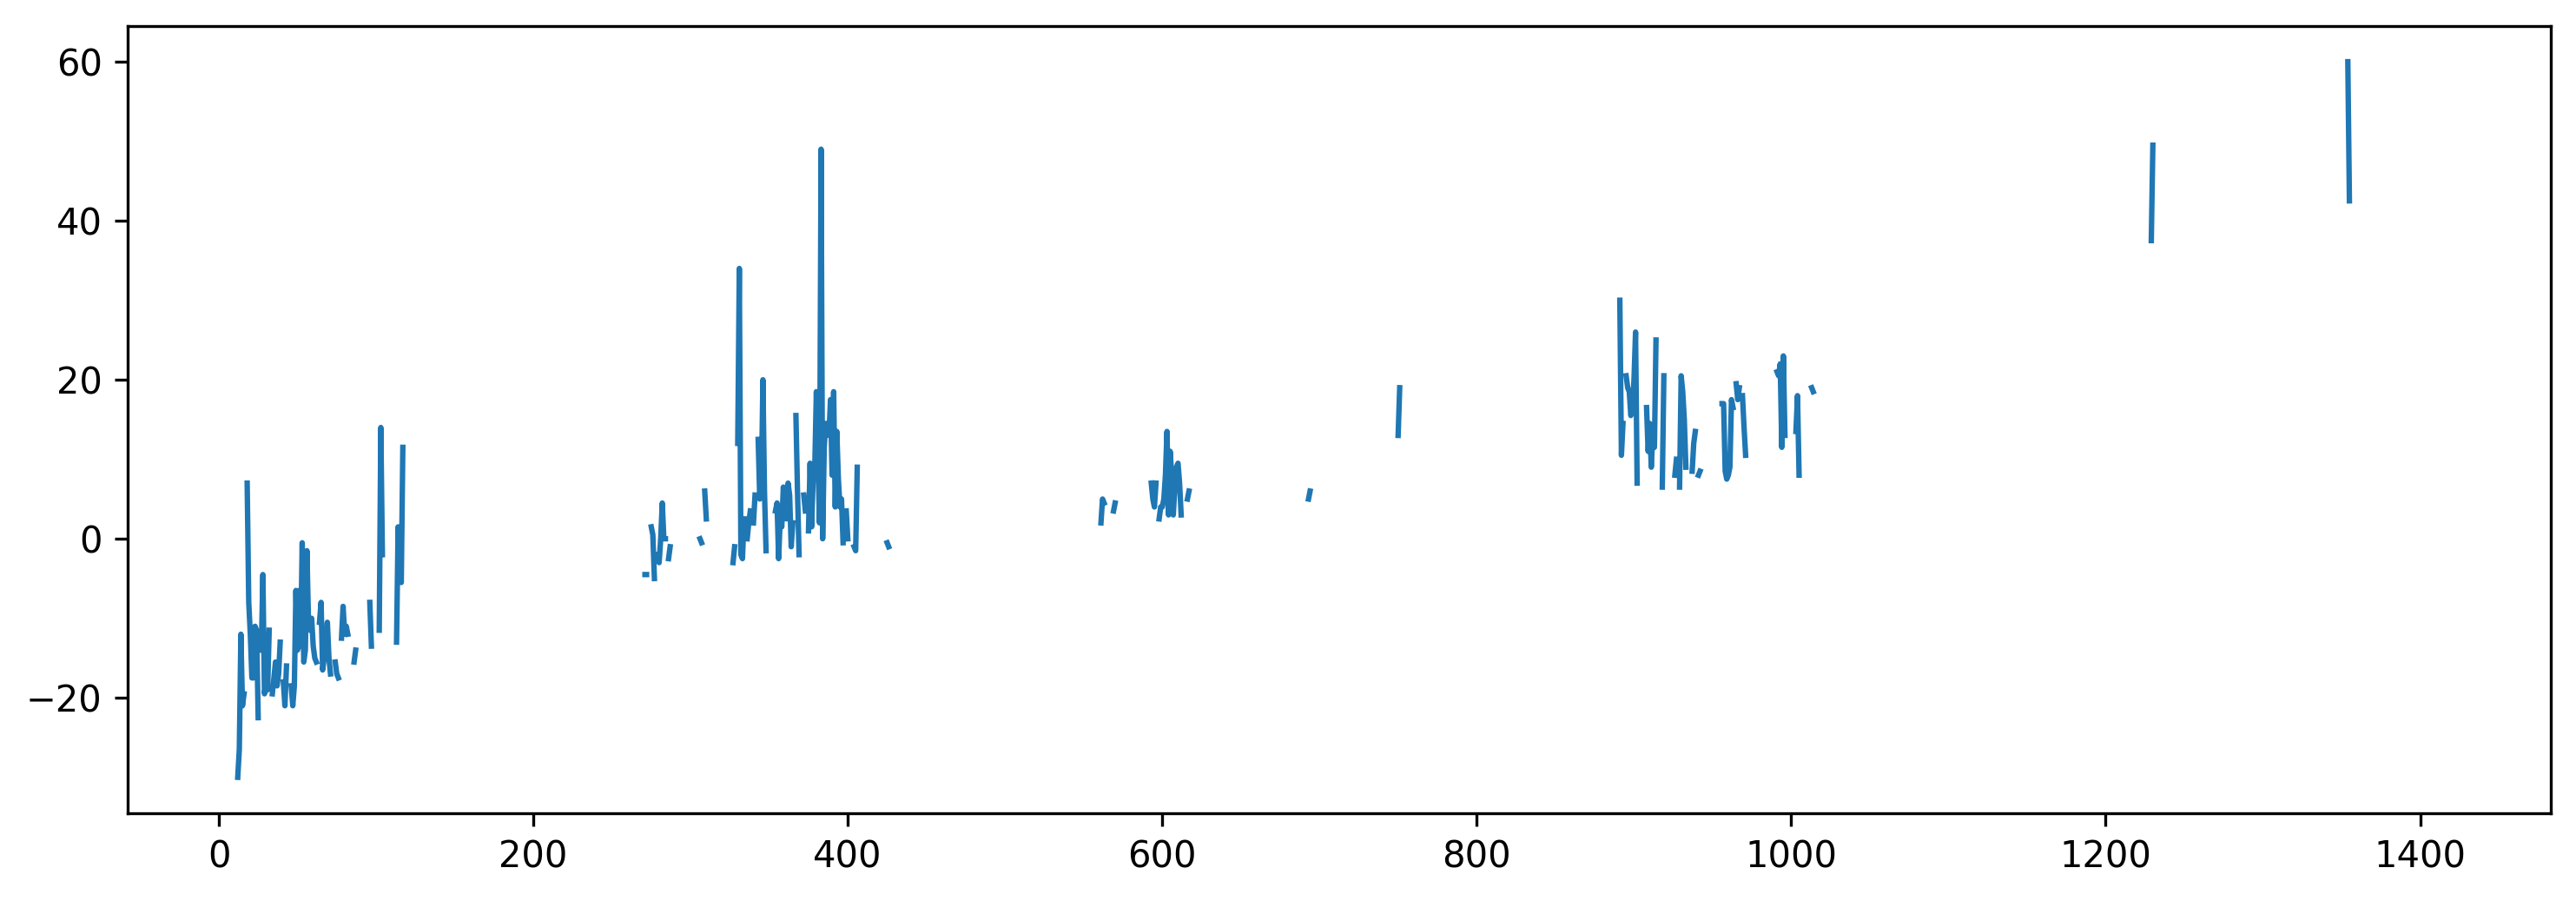

In [8]:
# 5. Create a A-Scope plot along the 300 degree azimuth
AScopeplot(RDRReflectivityFactor[300,:])

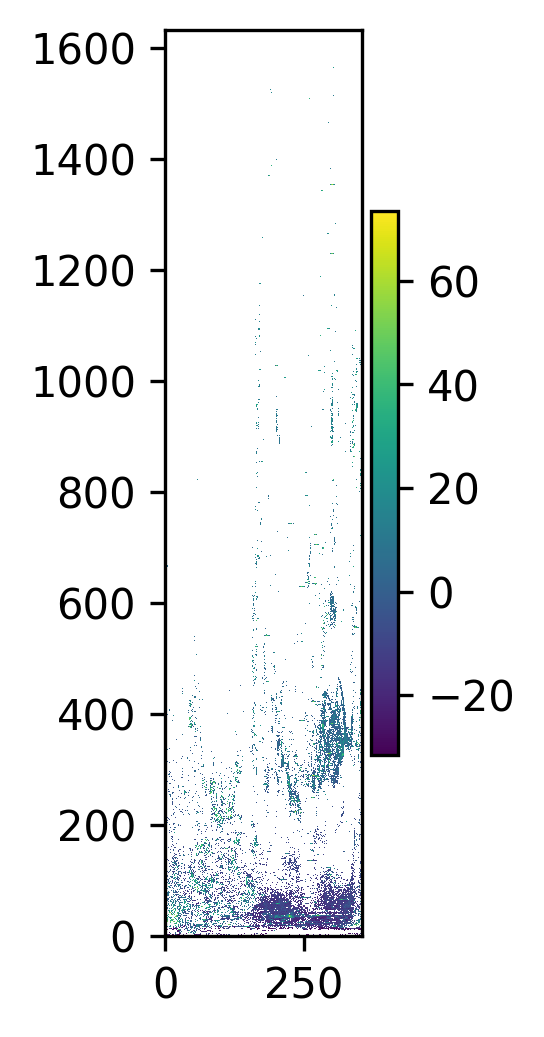

In [9]:
#6. Create a B Scope plot of the data
BScopeplot(RDRReflectivityFactor.T)

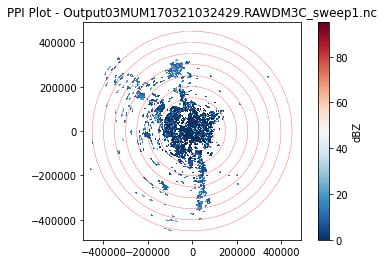

<Figure size 960x640 with 0 Axes>

In [10]:
#7. Create a PPI plot of the data
PPI_plot(RDRReflectivityFactor,r,az,0,95)